In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
X.shape

(569, 30)

In [5]:
y.shape

(569,)

In [7]:
# Print basic information about the dataset
print("Dataset Shape:", X.shape)
print("Target Classes:", np.unique(y))
print("Feature Names:", X.columns.tolist()[0:10])  # Show first 5 features


Dataset Shape: (569, 30)
Target Classes: [0 1]
Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']


In [8]:

# Step 2: Check for missing values
print(f"\nChecking for missing values:")
print(f"{X.isnull().sum().sum()} missing values found")


Checking for missing values:
0 missing values found


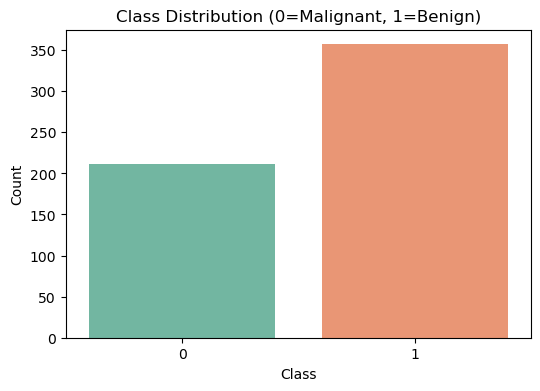

In [9]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title('Class Distribution (0=Malignant, 1=Benign)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
# Step 4: Train-Test Split FIRST (before scaling)
# Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [16]:

# Step 5: Apply StandardScaler AFTER train-test split
scaler = StandardScaler()
# Fit scaler on training data only
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data (don't fit on test data to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled.shape

(455, 30)

In [18]:
X_test_scaled.shape

(114, 30)

In [19]:
# Step 6: Train SVC Model
# Start with a default SVC model (RBF kernel)
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
# Step 7: Evaluate the Model
# Predict on training and test sets
y_train_pred = svc.predict(X_train_scaled)
y_test_pred = svc.predict(X_test_scaled)

In [21]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [22]:
print("\nInitial Model Evaluation:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Initial Model Evaluation:
Training Accuracy: 0.9824
Test Accuracy: 0.9825


In [23]:
# Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))


Classification Report (Test Set):
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [36]:
# Step 8: Hyperparameter Tuning
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.1, 0.5, 1, 10],
    'kernel': [ 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 0.1, 1, 5]
}

In [37]:
param_grid

{'C': [0.001, 0.1, 0.5, 1, 10],
 'kernel': ['poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 0.1, 1, 5]}

In [38]:
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [39]:
grid_search.fit(X_train_scaled, y_train)

,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.001, 0.1, ...], 'gamma': ['scale', 0.1, ...], 'kernel': ['poly', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.5


In [40]:
grid_search.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [41]:
grid_search.best_score_

0.9758241758241759

In [42]:
best_model = grid_search.best_estimator_

In [43]:
best_model

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_test_pred_tuned = best_model.predict(X_test_scaled)

In [45]:
y_test_pred_tuned

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [46]:
# Calculate accuracy
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)

In [47]:
test_accuracy_tuned

0.9736842105263158

In [48]:
cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)

In [49]:
cm_tuned

array([[40,  2],
       [ 1, 71]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))